1. Importações 


In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

2. Carregando arquivo

In [91]:
#carregando o arquivo 
base_credit = pd.read_csv('credit_data.csv')
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


3. Pré-processamento 


In [92]:
#localização de idades invalidas 
base_credit.loc[base_credit['age']<0]


,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [93]:
#descobrindo a media das idades
base_credit['age'][base_credit['age']>0].mean()


40.92770044906149

In [94]:
#substituindo os idades invalidas pela a media
base_credit.loc[base_credit['age']< 0, 'age'] = 40.92
base_credit.loc[base_credit['age']< 0]

,clientid,income,age,loan,default


In [95]:
#valores faltantes
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [96]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [97]:
#preenchendo os valores NaN com a media 
base_credit['age'].fillna(base_credit['age'].mean(), inplace= True)

C:\Users\allla\AppData\Local\Temp\ipykernel_7820\3449043134.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_credit['age'].fillna(base_credit['age'].mean(), inplace= True)


4. Dividindo entre previsões e classes

In [98]:
#divisão entre previsores e classes 
x_credit = base_credit.iloc[:,1:4].values
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [99]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [100]:


print(Counter(y_credit))


Counter({0: 1717, 1: 283})


5. Escalonamento dos atributos 

In [101]:
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)


6. Divisão de treinamento e testes 

In [102]:
#divisão de treinamento e testes 
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size= 0.30, random_state= 0)

In [103]:
print(Counter(y_credit_treinamento))

Counter({0: 1193, 1: 207})


In [104]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1400, 3), (1400,))

7. Aplicando o método smote nas bases de treinamento 


In [105]:
smote = SMOTE (random_state=42)
x_credit_treinamento2, y_credit_treinamento2 = smote.fit_resample(x_credit_treinamento,y_credit_treinamento)

In [106]:
print(Counter(y_credit_treinamento2))

Counter({0: 1193, 1: 1193})


In [107]:
x_credit_treinamento2.shape, y_credit_treinamento2.shape

((2386, 3), (2386,))

8. Salvando os dados processados e balanceados 

In [108]:
with open('credito_res3.pkl', mode='wb') as f:
 pickle.dump([x_credit_treinamento2, y_credit_treinamento2, x_credit_teste, y_credit_teste], f)

ARVORE DE DESCISÃO 

In [109]:
#carregando arquivo:
with open('credito_res3.pkl', 'rb') as f:
    x_credit_treinamento2, y_credit_treinamento2, x_credit_teste, y_credit_teste = pickle.load(f)

In [110]:
#treinando a arvore
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state= 0)
arvore_credit.fit(x_credit_treinamento2, y_credit_treinamento2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [111]:
#previsoes
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

MATRIZ DE CONFUSÃO

In [112]:
# from yellowbrick.classifier import ConfusionMatrix
# cm = ConfusionMatrix(arvore_credit)
# cm.fit(x_credit_treinamento, y_credit_treinamento)
# cm.score(x_credit_teste, y_credit_teste)

AVALIAÇÃO COM MÉTRICAS COMPLETAS - ÁRVORE DE DESCISÃO 

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_credit_teste, previsoes)
prec = precision_score(y_credit_teste, previsoes)
rec = recall_score(y_credit_teste, previsoes)
f1 = f1_score(y_credit_teste, previsoes)
cm = confusion_matrix(y_credit_teste, previsoes)

print(f"Acurácia: {acc:.4f}")
print(f"Precisão: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Matriz de Confusão:\n", cm)

Acurácia: 0.9817
Precisão: 0.9221
Recall: 0.9342
F1-Score: 0.9281
Matriz de Confusão:
 [[518   6]
 [  5  71]]


CURVA ROC + AUC - ÁRVORE DE DECISÃO

AUC: 0.9614


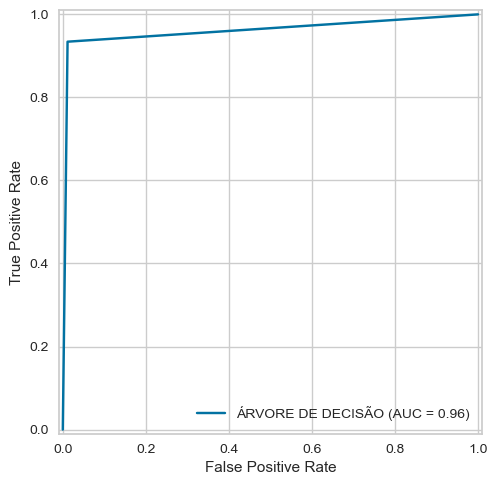

In [131]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Para modelos que suportam .predict_proba
y_proba = arvore_credit.predict_proba(x_credit_teste)[:, 1]

fpr, tpr, thresholds = roc_curve(y_credit_teste, y_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.4f}")

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ÁRVORE DE DECISÃO").plot()


GRÁFICO DA ÁRVORE


In [115]:
# from sklearn import tree
# previsoes = ['income', 'age', 'loan']
# fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
# tree.plot_tree(arvore_credit, feature_names = previsoes, class_names = ['0','1'], filled = True);
# fig.savefig('arvore_credit.png')

-------------------------------------------------------------------------------------------------------------------------------------------

MAQUINAS DE VETORES DE SUPORTE (SVM)

In [116]:
from sklearn.svm import SVC


In [117]:
x_credit_treinamento2.shape, y_credit_treinamento2.shape

((2386, 3), (2386,))

In [118]:
#fazendo o treinamento
svm_credit = SVC(kernel = 'rbf', random_state=1, C =2.0)
svm_credit.fit(x_credit_treinamento2, y_credit_treinamento2)

SVC(C=2.0, random_state=1)

In [119]:
previsoesSVM = svm_credit.predict(x_credit_teste)


In [120]:
# from yellowbrick.classifier import ConfusionMatrix
# cm = ConfusionMatrix(svm_credit)
# cm.fit(x_credit_treinamento, y_credit_treinamento)
# cm.score(x_credit_teste, y_credit_teste)

AVALIAÇÃO COM MÉTRICAS COMPLETAS - SVM

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_credit_teste, previsoesSVM)
prec = precision_score(y_credit_teste, previsoesSVM)
rec = recall_score(y_credit_teste, previsoesSVM)
f1 = f1_score(y_credit_teste, previsoesSVM)
cm = confusion_matrix(y_credit_teste, previsoesSVM)

print(f"Acurácia: {acc:.4f}")
print(f"Precisão: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Matriz de Confusão:\n", cm)


Acurácia: 0.9767
Precisão: 0.8523
Recall: 0.9868
F1-Score: 0.9146
Matriz de Confusão:
 [[511  13]
 [  1  75]]


CURVA ROC + AUC - SVM


AUC: 0.9984


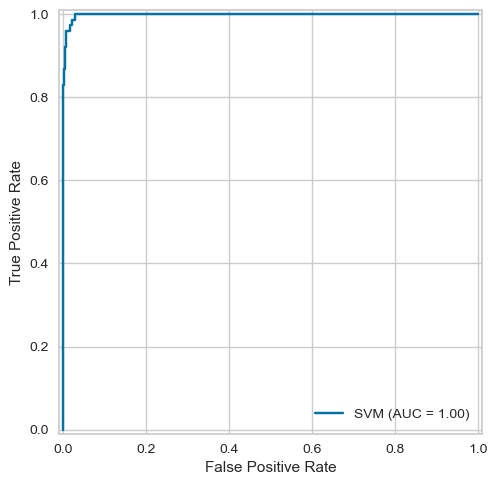

In [122]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Para modelos que suportam .predict_proba
y_proba = svm_credit.decision_function(x_credit_teste)

fpr, tpr, thresholds = roc_curve(y_credit_teste, y_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.4f}")

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="SVM").plot()

---------------------------------------------------------------------------------------------------------------------------------------------------------

REDES NEURAIS ARTIFICIAIS

In [123]:
from sklearn.neural_network import MLPClassifier

In [124]:
#from sklearn.model_selection import GridSearchCV

#from sklearn.model_selection import RepeatedStratifiedKFold

##Repeated K-Fold para maior estabilidade
#rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

## Modelo base

#mlp = MLPClassifier(max_iter=1500, tol=0.00001, random_state=42)

## Espaço de busca de hiperparâmetros
#param_grid = {
 #   'hidden_layer_sizes': [(20,), (50,), (20,10), (50,25)],
  #  'activation': ['relu', 'tanh'],
   # 'solver': ['adam', 'lbfgs'],
    #'alpha': [0.0001, 0.001, 0.01],
    #'learning_rate_init': [0.001, 0.0005]
#}

## GridSearch com validação cruzada
#grid_search = GridSearchCV(estimator=mlp,
 #                          param_grid=param_grid,
  #                         cv=rkf,
   #                        scoring='accuracy',
    #                       n_jobs=-1,  # usa todos os núcleos disponíveis
     #                      verbose=2)

# #Executa a busca
#grid_search.fit(x_credit_treinamento2, y_credit_treinamento2)

## Exibe os melhores parâmetros encontrados
#print("Melhores Hiperparâmetros:")
#print(grid_search.best_params_)

# Melhor acurácia obtida
#print(f"Melhor Acurácia Média: {grid_search.best_score_:.4f}")


In [125]:
#rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0001, solver=['adam', 'lbfgs'], activation='relu', hidden_layer_sizes=(20,10))
from sklearn.neural_network import MLPClassifier

# Modelo com os melhores hiperparâmetros encontrados via GridSearchCV
rede_neural_credit = MLPClassifier(
    activation='tanh',
    alpha=0.0001,
    hidden_layer_sizes=(20, 10),
    learning_rate_init=0.001,
    solver='adam',
    max_iter=1500,
    verbose=True,
    tol=1e-5
)


rede_neural_credit.fit(x_credit_treinamento2,y_credit_treinamento2,)


Iteration 1, loss = 0.70514232
Iteration 2, loss = 0.62502511
Iteration 3, loss = 0.55762970
Iteration 4, loss = 0.50154003
Iteration 5, loss = 0.45406838
Iteration 6, loss = 0.41269090
Iteration 7, loss = 0.37630127
Iteration 8, loss = 0.34477232
Iteration 9, loss = 0.31706313
Iteration 10, loss = 0.29287159
Iteration 11, loss = 0.27214961
Iteration 12, loss = 0.25405106
Iteration 13, loss = 0.23842523
Iteration 14, loss = 0.22517933
Iteration 15, loss = 0.21358729
Iteration 16, loss = 0.20368615
Iteration 17, loss = 0.19505312
Iteration 18, loss = 0.18758291
Iteration 19, loss = 0.18090134
Iteration 20, loss = 0.17525286
Iteration 21, loss = 0.17003644
Iteration 22, loss = 0.16554809
Iteration 23, loss = 0.16138415
Iteration 24, loss = 0.15770639
Iteration 25, loss = 0.15439146
Iteration 26, loss = 0.15139343
Iteration 27, loss = 0.14870368
Iteration 28, loss = 0.14602068
Iteration 29, loss = 0.14375407
Iteration 30, loss = 0.14155415
Iteration 31, loss = 0.13971291
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 10), max_iter=1500,
              tol=1e-05, verbose=True)

In [126]:
previsoesRN = rede_neural_credit.predict(x_credit_teste)


AVALIAÇÃO MÉTRICAS COMPLETAS - REDES NEURIAS 

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc = accuracy_score(y_credit_teste, previsoesRN)
prec = precision_score(y_credit_teste, previsoesRN)
rec = recall_score(y_credit_teste, previsoesRN)
f1 = f1_score(y_credit_teste, previsoesRN)
cm = confusion_matrix(y_credit_teste, previsoesRN)

print(f"Acurácia: {acc:.4f}")
print(f"Precisão: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Matriz de Confusão:\n", cm)

Acurácia: 0.9950
Precisão: 0.9867
Recall: 0.9737
F1-Score: 0.9801
Matriz de Confusão:
 [[523   1]
 [  2  74]]


CURVA ROC + AUC - REDES NEURAIS 

AUC: 0.9998


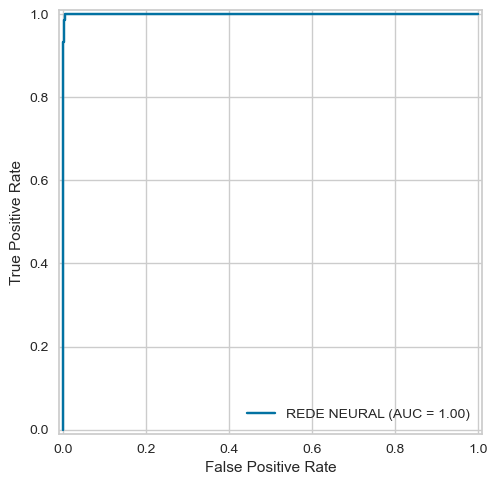

In [128]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Para modelos que suportam .predict_proba
y_proba = rede_neural_credit.predict_proba(x_credit_teste)[:, 1]

fpr, tpr, thresholds = roc_curve(y_credit_teste, y_proba)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.4f}")

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="REDE NEURAL").plot()


------------------------------------------------------------



VALIDAÇÃO CRUZADA

In [129]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define os modelos em um dicionário
modelos = {
    'Árvore': arvore_credit,
    'SVM': svm_credit
   
}

# Avaliação com 10-fold cross-validation
for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, x_credit_treinamento2, y_credit_treinamento2, cv=10, scoring='accuracy')
    print(f"{nome}: Acurácia Média = {scores.mean():.4f} | Desvio Padrão = {scores.std():.4f}")


Árvore: Acurácia Média = 0.9891 | Desvio Padrão = 0.0092
SVM: Acurácia Média = 0.9837 | Desvio Padrão = 0.0058


In [130]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np




# Repeated K-Fold (10 folds, 8 repetições)
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=8, random_state=42)

# Validação cruzada com métrica de acurácia
scores = cross_val_score(rede_neural_credit, x_credit_treinamento2, y_credit_treinamento2, cv=rkf, scoring='accuracy')

# Resultados
print(f"Rede Neural: Acurácia Média = {scores.mean():.4f} | Desvio Padrão = {scores.std():.4f}")


Iteration 1, loss = 0.65960494
Iteration 2, loss = 0.53613222
Iteration 3, loss = 0.45778037
Iteration 4, loss = 0.40985296
Iteration 5, loss = 0.37741435
Iteration 6, loss = 0.35093714
Iteration 7, loss = 0.32859504
Iteration 8, loss = 0.30852707
Iteration 9, loss = 0.29046868
Iteration 10, loss = 0.27426876
Iteration 11, loss = 0.25985924
Iteration 12, loss = 0.24684710
Iteration 13, loss = 0.23500818
Iteration 14, loss = 0.22461990
Iteration 15, loss = 0.21517189
Iteration 16, loss = 0.20690324
Iteration 17, loss = 0.19935436
Iteration 18, loss = 0.19266948
Iteration 19, loss = 0.18648799
Iteration 20, loss = 0.18127470
Iteration 21, loss = 0.17657199
Iteration 22, loss = 0.17173231
Iteration 23, loss = 0.16767953
Iteration 24, loss = 0.16377584
Iteration 25, loss = 0.16040442
Iteration 26, loss = 0.15723801
Iteration 27, loss = 0.15441275
Iteration 28, loss = 0.15179192
Iteration 29, loss = 0.14935003
Iteration 30, loss = 0.14714012
Iteration 31, loss = 0.14510963
Iteration 32, los

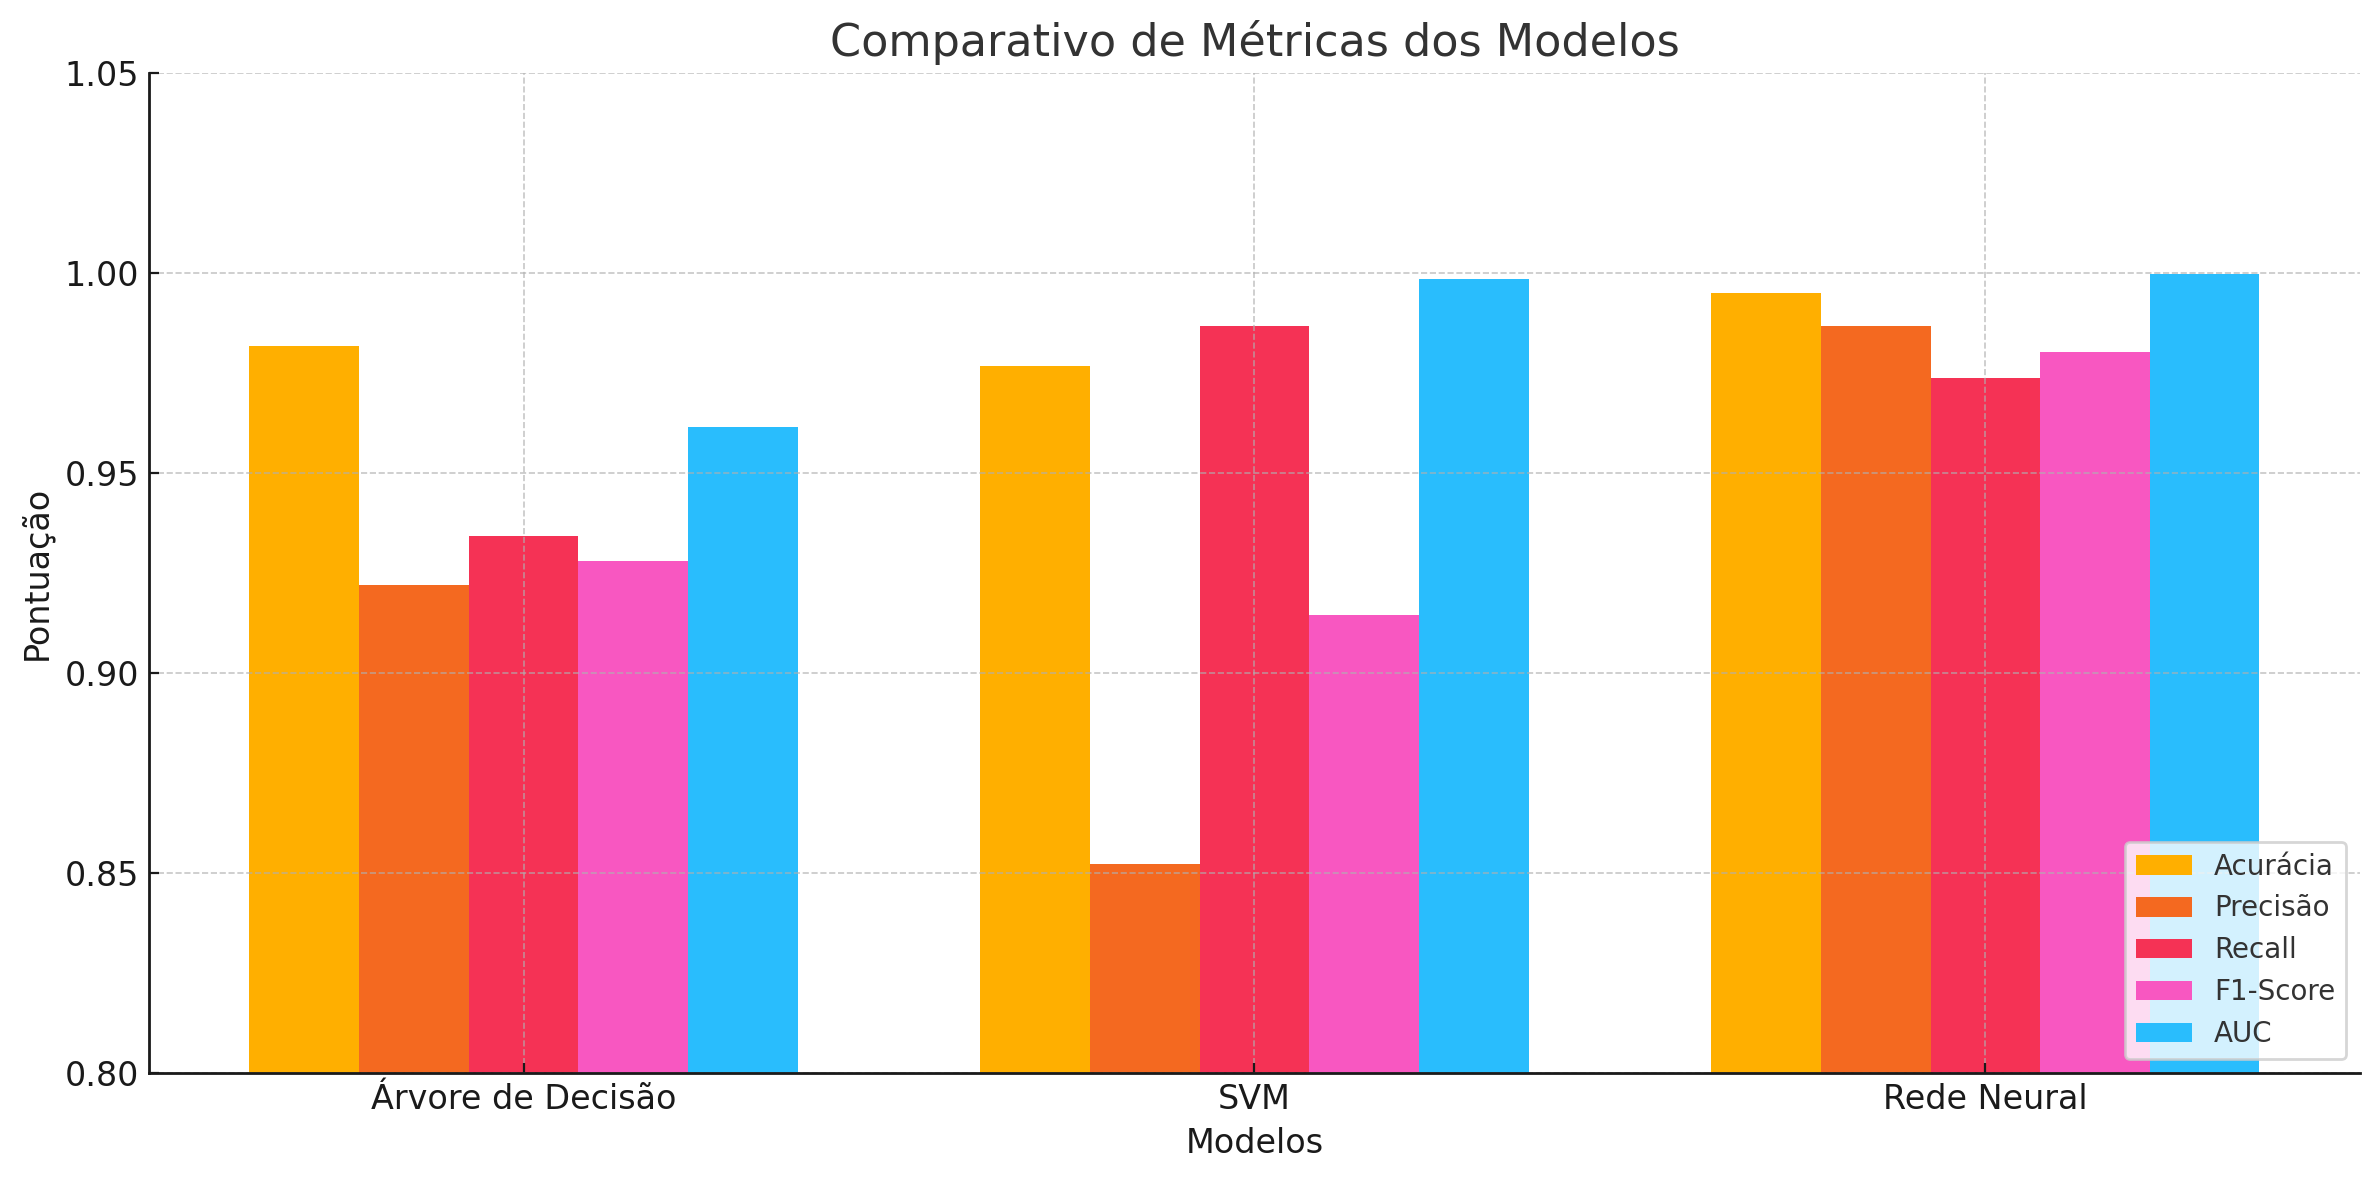